# Historical Analysis & Reports

### Project : Fittlyf Analysis & Report

You are assigned with the task to do Historical Analysis on the past months data sets of Facebook Ad Campaign Data, Lead-To-Customer Data and Customer Survey Data.
- Create report for PPC Analysis
- Create report for Customer Analysis
- Create report for Survey Analysis

## 0. Imports & Initial Setup

In [76]:
# Imports

%matplotlib inline
import pandas as pd # Import for Pandas
import numpy as np # Import for Numpy
import matplotlib # Import for Matplotlib
import matplotlib.pyplot as plt # Import for Matplotlib Pyplot
import seaborn as sns # Import for Seaborn

In [77]:
# Visulisation Setting

sns.set_style('darkgrid')
plt.style.use('seaborn-darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Section 1. Facebook Ad Campaign Analysis ( PPC Analysis )

In [2]:
# Importing PPC Dataset 

facebook_df = pd.read_excel('Historical-Analysis-Solution.xlsx',sheet_name='Facebook-PPC-Data')
facebook_df

,Date,ID,Facebook Campaign,Facebook Impressions,Facebook Clicks,Facebook Cost,Facebook CTR,Facebook Conversions,Facebook CVR
0,2022-01-01,6582,FB_Jan22,1564,40,491.2785,0.025575,3,0.075000
1,2022-01-02,6583,FB_Jan22,2925,54,650.8855,0.018462,4,0.074074
2,2022-01-03,6584,FB_Jan22,2519,44,516.7975,0.017467,4,0.090909
3,2022-01-04,6585,FB_Jan22,1365,33,308.0400,0.024176,2,0.060606
4,2022-01-05,6586,FB_Jan22,2272,40,504.9440,0.017606,4,0.100000
...,...,...,...,...,...,...,...,...,...
85,2022-03-27,6667,FB_Mar22,1249,45,363.1550,0.036029,3,0.066667
86,2022-03-28,6668,FB_Mar22,2568,49,766.1740,0.019081,5,0.102041
87,2022-03-29,6669,FB_Mar22,2698,68,926.5360,0.025204,5,0.073529
88,2022-03-30,6670,FB_Mar22,1561,46,560.5875,0.029468,4,0.086957


In [3]:
# Basic Info About Dataset

facebook_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  90 non-null     datetime64[ns]
 1   ID                    90 non-null     int64         
 2   Facebook Campaign     90 non-null     object        
 3   Facebook Impressions  90 non-null     int64         
 4   Facebook Clicks       90 non-null     int64         
 5   Facebook Cost         90 non-null     float64       
 6   Facebook CTR          90 non-null     float64       
 7   Facebook Conversions  90 non-null     int64         
 8   Facebook CVR          90 non-null     float64       
dtypes: datetime64[ns](1), float64(3), int64(4), object(1)
memory usage: 6.5+ KB


In [4]:
# Checking Column Names

facebook_df.columns

Index(['Date', 'ID', 'Facebook Campaign ', 'Facebook Impressions',
       'Facebook Clicks', 'Facebook Cost', 'Facebook CTR',
       'Facebook Conversions', 'Facebook CVR'],
      dtype='object')

In [6]:
# Basic Statistical Knowledge

facebook_df.describe()

,ID,Facebook Impressions,Facebook Clicks,Facebook Cost,Facebook CTR,Facebook Conversions,Facebook CVR
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,6626.500000,2189.200000,49.911111,590.264033,0.023188,4.100000,0.080472
std,26.124701,599.561866,13.923260,228.443653,0.004207,1.579717,0.014949
min,6582.000000,1185.000000,26.000000,226.500000,0.016207,1.000000,0.034483
25%,6604.250000,1587.750000,39.250000,416.137125,0.019526,3.000000,0.071429
50%,6626.500000,2250.500000,49.000000,526.159500,0.023361,4.000000,0.080000
75%,6648.750000,2700.250000,60.750000,777.612250,0.025669,5.000000,0.090909
max,6671.000000,3098.000000,83.000000,1187.615000,0.036029,7.000000,0.114754


### 1.1 Summary Monthly

In [7]:
# Monthly Total Values

temp_df = facebook_df.groupby(['Facebook Campaign ']).sum()[['Facebook Cost','Facebook Impressions',
                                                   'Facebook Clicks','Facebook Conversions']]
temp_df

,Facebook Cost,Facebook Impressions,Facebook Clicks,Facebook Conversions
Facebook Campaign,,,,
FB_Feb22,16898.2590,61886,1413,117
FB_Jan22,19014.5995,69965,1561,131
FB_Mar22,17210.9045,65177,1518,121


In [8]:
# Helper Functions : Average Calculations

def average_calculation(df):
    
    # Cost Per Click 
    df['Cost Per Click'] = df['Facebook Cost']/df['Facebook Clicks']

    # Click Through Rate
    df['Click Through Rate'] = df['Facebook Clicks']/df['Facebook Impressions']*100

    # Converstion Ratio
    df['Converstion Ratio'] = df['Facebook Conversions']/df['Facebook Clicks']*100
    
    return df

In [9]:
# Average Calulations

monthly_stats = average_calculation(temp_df)
monthly_stats

,Facebook Cost,Facebook Impressions,Facebook Clicks,Facebook Conversions,Cost Per Click,Click Through Rate,Converstion Ratio
Facebook Campaign,,,,,,,
FB_Feb22,16898.2590,61886,1413,117,11.959136,2.283230,8.280255
FB_Jan22,19014.5995,69965,1561,131,12.181037,2.231116,8.392056
FB_Mar22,17210.9045,65177,1518,121,11.337882,2.329042,7.971014


### 1.2 Total Summary

In [14]:
# Copying Monthy Table
total = temp_df

# Calculating Total and Transposing
total = pd.DataFrame(total.sum(), columns=['Values']).T

# Applying Average Function
overall_stats = average_calculation(total)

# Total Final Output
overall_stats.T

,Values
Facebook Cost,53123.763000
Facebook Impressions,197028.000000
Facebook Clicks,4492.000000
Facebook Conversions,369.000000
Cost Per Click,11.826305
Click Through Rate,2.279879
Converstion Ratio,8.214604


### 1.3 Cost Per Lead Calculation

In [15]:
# Helper Functions : Cost Per Lead Calculations

def cost_per_lead_calc(amount,data):
    
    # Empty Dictionary
    cost_lead = dict()
    
    # Amount
    cost_lead['Budget Assumption'] = amount
    
    # Average CPC
    cost_lead['Average CPC'] = round(data['Cost Per Click'],2)
    
    # Average Total Clicks 
    cost_lead['Average Total Clicks'] = round(amount/data['Cost Per Click'],0)
    
    # Average Lead Conversion 
    cost_lead['Average Lead CNV'] = round(data['Converstion Ratio'],2)
    
    # Average Total Leads
    cost_lead['Average Total Leads'] = round(cost_lead['Average Total Clicks']*data['Converstion Ratio']/100,0)
    
    # Cost Per Lead 
    cost_lead['Cost Per Lead'] = round(amount/cost_lead['Average Total Leads'],2)
    
    # Dataframe Formation
    df = pd.DataFrame(cost_lead)
    
    return df.T

In [17]:
# Cost Per Lead Summary Table

cost_per_lead_stats = cost_per_lead_calc(25000,total)
cost_per_lead_stats

,Values
Budget Assumption,25000.00
Average CPC,11.83
Average Total Clicks,2114.00
Average Lead CNV,8.21
Average Total Leads,174.00
Cost Per Lead,143.68


## Section 2. Customer Survey Analysis

In [19]:
# Imprting Customer Survey Dataset

survey_df = pd.read_excel('Historical-Analysis-Solution.xlsx', sheet_name='Survey-Data')
survey_df

,Lead Source,Age,Age Group,How likely is it that you would recommend our services to a friend or colleague?,How did you first hear about our counselling program ?,How likely are you to book another session from us?,"If you are not likely to book another session, what's the main reason?"
0,Facebook,19,18-25,10,Blog Post,Likely,NaN
1,Facebook,23,18-25,9,Blog Post,Likely,NaN
2,Facebook,19,18-25,5,Blog Post,Not likely,Too expensive
3,Facebook,21,18-25,10,Blog Post,Very likely,NaN
4,Facebook,23,18-25,9,Blog Post,Very likely,NaN
...,...,...,...,...,...,...,...
89,Facebook,28,26-30,10,Web Search,Not likely,Don’t need any more
90,Facebook,30,26-30,9,Web Search,Not sure,NaN
91,Facebook,31,31-35,10,Web Search,Very likely,NaN
92,Facebook,29,26-30,9,Web Search,Very likely,NaN


In [22]:
# Basic Info

survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 7 columns):
 #   Column                                                                            Non-Null Count  Dtype 
---  ------                                                                            --------------  ----- 
 0   Lead Source                                                                       94 non-null     object
 1   Age                                                                               94 non-null     int64 
 2   Age Group                                                                         94 non-null     object
 3   How likely is it that you would recommend our services to a friend or colleague?  94 non-null     int64 
 4   How did you first hear about our counselling program ?                            94 non-null     object
 5   How likely are you to book another session from us?                               94 non-null     object
 6   If you are no

In [93]:
# Rename Column ( For Easy Use Case )

survey_df.columns = ['Lead-Source', 'Age', 'Age-Group','Recommend','First-Touch-Point','Likely-To-Book','Reason']

### 2.1 Univariate Analysis

In [94]:
# Age Distribution

age_distribution = survey_df['Age-Group'].value_counts()
age_distribution

18-25    58
26-30    17
31-35    10
36-40     6
41-45     3
Name: Age-Group, dtype: int64

In [95]:
# Recommendation Level Distribution

recommend_distribution = survey_df['Recommend'].value_counts()
recommend_distribution

9     39
10    21
8     15
7     14
5      2
4      2
3      1
Name: Recommend, dtype: int64

In [97]:
# First Touch Distribution

first_touch_distribution = survey_df['First-Touch-Point'].value_counts()
first_touch_distribution

Friend, Family, or Colleague    32
Other                           25
Online Advertisement            14
Web Search                      12
Blog Post                       11
Name: First-Touch-Point, dtype: int64

In [98]:
# Likely To Book Distribution

book_again_distribution = survey_df['Likely-To-Book'].value_counts()
book_again_distribution

Likely         34
Very likely    33
Not sure       12
Not likely     10
Never again     5
Name: Likely-To-Book, dtype: int64

In [99]:
# Not Likely To Book Distribution

not_book_reason_dist = survey_df['Reason'].value_counts()
not_book_reason_dist

Don’t need any more         13
Too expensive                8
Didn't meet expectations     5
Low quality                  2
Name: Reason, dtype: int64

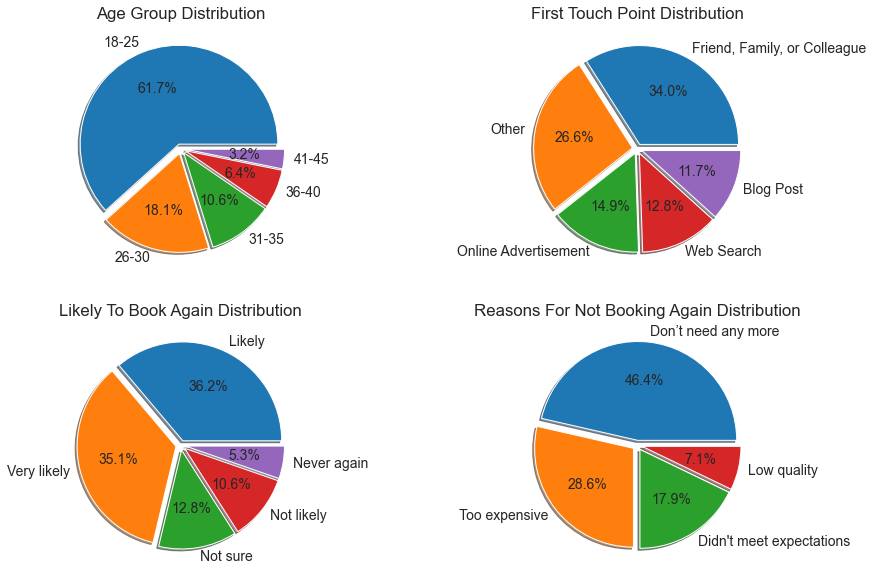

In [101]:
# Distribution Plots

fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(ncols=2,nrows=2, figsize=(15,10))

# Subplot 1
ax1.pie(survey_df['Age-Group'].value_counts(),
        labels= survey_df['Age-Group'].value_counts().index , 
        autopct='%1.1f%%',explode=[0.05,0.05,0.05, 0.05,0.05] ,startangle=0, shadow = True);
ax1.set(title='Age Group Distribution');

# Subplot 2
ax2.pie(survey_df['First-Touch-Point'].value_counts(),
        labels= survey_df['First-Touch-Point'].value_counts().index , 
        autopct='%1.1f%%',explode=[0.05,0.05,0.05,0.05,0.05] ,startangle=0, shadow = True);
ax2.set(title='First Touch Point Distribution');

# Subplot 1
ax3.pie(survey_df['Likely-To-Book'].value_counts(),
        labels= survey_df['Likely-To-Book'].value_counts().index , 
        autopct='%1.1f%%',explode=[0.05,0.05,0.05, 0.05,0.05] ,startangle=0, shadow = True);
ax3.set(title='Likely To Book Again Distribution');

# Subplot 2
ax4.pie(survey_df['Reason'].value_counts(),
        labels= survey_df['Reason'].value_counts().index , 
        autopct='%1.1f%%',explode=[0.05,0.05,0.05,0.05] ,startangle=0, shadow = True);
ax4.set(title='Reasons For Not Booking Again Distribution');

### 2.2 Cross Tabulation

In [188]:
# Age Group vs First Touch Point Distribution

pd.crosstab(survey_df['Age-Group'],survey_df['First-Touch-Point'], margins=True, normalize=True)*100

First-Touch-Point,Blog Post,"Friend, Family, or Colleague",Online Advertisement,Other,Web Search,All
Age-Group,,,,,,
18-25,7.446809,23.404255,9.574468,14.893617,6.382979,61.702128
26-30,1.063830,5.319149,1.063830,6.382979,4.255319,18.085106
31-35,1.063830,2.127660,2.127660,4.255319,1.063830,10.638298
36-40,2.127660,2.127660,1.063830,1.063830,0.000000,6.382979
41-45,0.000000,1.063830,1.063830,0.000000,1.063830,3.191489
All,11.702128,34.042553,14.893617,26.595745,12.765957,100.000000


In [189]:
# Age Group vs Likely To Book Distribution

pd.crosstab(survey_df['Age-Group'],survey_df['Likely-To-Book'], margins=True, normalize=True)*100

Likely-To-Book,Likely,Never again,Not likely,Not sure,Very likely,All
Age-Group,,,,,,
18-25,26.595745,4.255319,5.319149,6.382979,19.148936,61.702128
26-30,5.319149,1.063830,3.191489,2.127660,6.382979,18.085106
31-35,2.127660,0.000000,2.127660,2.127660,4.255319,10.638298
36-40,2.127660,0.000000,0.000000,1.063830,3.191489,6.382979
41-45,0.000000,0.000000,0.000000,1.063830,2.127660,3.191489
All,36.170213,5.319149,10.638298,12.765957,35.106383,100.000000


In [190]:
# Age Group vs Reason To Not Book Distribution

pd.crosstab(survey_df['Age-Group'],survey_df['Reason'], margins=True, normalize=True)*100

Reason,Didn't meet expectations,Don’t need any more,Low quality,Too expensive,All
Age-Group,,,,,
18-25,10.714286,28.571429,3.571429,21.428571,64.285714
26-30,0.000000,10.714286,0.000000,7.142857,17.857143
31-35,7.142857,3.571429,3.571429,0.000000,14.285714
36-40,0.000000,3.571429,0.000000,0.000000,3.571429
All,17.857143,46.428571,7.142857,28.571429,100.000000


In [191]:
# First Touch Point vs Likely To Book Distribution

pd.crosstab(survey_df['First-Touch-Point'],survey_df['Likely-To-Book'], margins=True, normalize=True)*100

Likely-To-Book,Likely,Never again,Not likely,Not sure,Very likely,All
First-Touch-Point,,,,,,
Blog Post,4.255319,0.000000,1.063830,0.000000,6.382979,11.702128
"Friend, Family, or Colleague",18.085106,2.127660,3.191489,1.063830,9.574468,34.042553
Online Advertisement,4.255319,2.127660,0.000000,3.191489,5.319149,14.893617
Other,4.255319,1.063830,5.319149,6.382979,9.574468,26.595745
Web Search,5.319149,0.000000,1.063830,2.127660,4.255319,12.765957
All,36.170213,5.319149,10.638298,12.765957,35.106383,100.000000


In [192]:
# First Touch Point vs Reason To Not Book Distribution

pd.crosstab(survey_df['First-Touch-Point'],survey_df['Reason'], margins=True, normalize=True)*100

Reason,Didn't meet expectations,Don’t need any more,Low quality,Too expensive,All
First-Touch-Point,,,,,
Blog Post,0.000000,0.000000,0.000000,3.571429,3.571429
"Friend, Family, or Colleague",7.142857,25.000000,3.571429,7.142857,42.857143
Online Advertisement,3.571429,3.571429,0.000000,10.714286,17.857143
Other,7.142857,10.714286,3.571429,7.142857,28.571429
Web Search,0.000000,7.142857,0.000000,0.000000,7.142857
All,17.857143,46.428571,7.142857,28.571429,100.000000


### 2.3 Overall Stats

In [119]:
# Net Promoter Score

def promoter_score(value):
    
    if value in [0,1,2,3,4,5,6]: # Condition 1
        return 'Detractor'
    if value in [9,10]: # Condition 2
        return 'Promoter'
    else:
        return 'Neutral'

survey_df['NPS'] = survey_df['Recommend'].apply(promoter_score)
survey_df['NPS'].value_counts()

Promoter     60
Neutral      29
Detractor     5
Name: NPS, dtype: int64

In [132]:
# Total Value
total = survey_df['NPS'].count()

# Promoter Percentage
promoter = round(survey_df['NPS'].value_counts()[0]/ total*100,2)

# Demoter Percentage
demoter = round(survey_df['NPS'].value_counts()[2]/total*100,2)

# NPS Score
nps = promoter - demoter

In [133]:
nps

58.51

In [134]:
# Likely to Book Again [ Retention Rate ]

survey_df['Likely-To-Book'].value_counts()

Likely         34
Very likely    33
Not sure       12
Not likely     10
Never again     5
Name: Likely-To-Book, dtype: int64

In [143]:
# Creating a List 
values = survey_df['Likely-To-Book'].value_counts().to_list()

# Total Value
total = survey_df['Likely-To-Book'].count()

# Likely Percentage
retention_rate = round(sum(values[0:2])/ total*100,2)

In [144]:
retention_rate

71.28

## Section 3. Lead To Customer Data Analysis 

In [145]:
# Importing Lead TO Customer Dataset 

lead_df = pd.read_excel('Historical-Analysis-Solution.xlsx', sheet_name='Lead-To-Customer-Data')
lead_df

,Customer ID,Sign-up Date,Counselling Session,Purch <30d post-session,Sent E-book email,Purch <30d post-email,Sent Promo email,Purch <15d post-email,Became Customer,Date of 1st Purchase,Transaction Time (days),"Total Purch, net",# Touch Pts to Purch
0,3046327,2022-01-01,1,1,0,0,0,0,1,2022-01-02,1.0,7210.11843,1.0
1,2182577,2022-01-01,1,0,1,0,1,0,0,NaT,NaN,0.00000,NaN
2,3186410,2022-01-01,1,0,1,0,1,0,0,NaT,NaN,0.00000,NaN
3,3046833,2022-01-01,0,0,1,0,1,0,0,NaT,NaN,0.00000,NaN
4,2903587,2022-01-01,0,0,1,0,1,0,0,NaT,NaN,0.00000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,2418868,2022-03-30,0,0,1,0,1,0,0,NaT,NaN,0.00000,NaN
369,2451866,2022-03-30,0,0,1,0,1,0,0,NaT,NaN,0.00000,NaN
370,2564704,2022-03-30,0,0,1,0,1,0,0,NaT,NaN,0.00000,NaN
371,1747719,2022-03-30,0,0,1,0,1,0,0,NaT,NaN,0.00000,NaN


In [146]:
# Basic Info

lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Customer ID              373 non-null    int64         
 1   Sign-up Date             373 non-null    datetime64[ns]
 2   Counselling Session      373 non-null    int64         
 3   Purch <30d post-session  373 non-null    int64         
 4   Sent E-book email        373 non-null    int64         
 5   Purch <30d post-email    373 non-null    int64         
 6   Sent Promo email         373 non-null    int64         
 7   Purch <15d post-email    373 non-null    int64         
 8   Became Customer          373 non-null    int64         
 9   Date of 1st Purchase     129 non-null    datetime64[ns]
 10  Transaction Time (days)  129 non-null    float64       
 11  Total Purch, net         373 non-null    float64       
 12  # Touch Pts to Purch     129 non-nul

### 3.1 Lead To Customer Overall Table Formation

In [169]:
# Dummy Dict
lead_dict = dict()

# Total Revenue Generated
tot_rev_gen = lead_df['Total Purch, net'].sum()
lead_dict['Total Revenue Generated'] = tot_rev_gen

# Total Customers Acquired
tot_cus_acq = lead_df['Became Customer'].sum()
lead_dict['Total Customers Acquired'] = tot_cus_acq

# Average Days to Purchase
avg_days_purch = round(lead_df['Transaction Time (days)'].mean(),0)
lead_dict['Average Days to Purchase'] = avg_days_purch

# Customer Acquisition Cost ( Value Taken from First Section)
cust_acq_cost = round(overall_stats['Facebook Cost']/tot_cus_acq,2)
lead_dict['Customer Acquisition Cost'] = cust_acq_cost

# Average Total Purchase
avg_tot_purch = round(lead_df['Total Purch, net'].mean(),2)
lead_dict['Average Total Purchase'] = avg_tot_purch

# Average Touch Points
avg_touch_points = round(lead_df['# Touch Pts to Purch'].mean(),1)
lead_dict['Average Touch Points'] = avg_touch_points

# Lead Purchase CVR % ( From Lead To Purchase )
lead_purch_conv_rate = round(tot_cus_acq/ overall['Facebook Conversions']*100,2)
lead_dict['Lead Purchase CVR %'] = lead_purch_conv_rate

In [172]:
# Table Formation

lead_overall = pd.DataFrame(lead_dict)
lead_overall.T

,Values
Total Revenue Generated,758751.762415
Total Customers Acquired,129.000000
Average Days to Purchase,22.000000
Customer Acquisition Cost,411.810000
Average Total Purchase,2034.190000
Average Touch Points,1.300000
Lead Purchase CVR %,34.960000


### 3.2 Customer Total Lifetime Value Summary Table

In [183]:
# Customer Total Lifetime Value

def cust_life_value(lead_overall,margin,discount,retention_rate):
    
    # Empty Dict
    customer_liftime_table = dict()
    
    # Average Total Purchase Cost
    atpc = round(lead_overall['Average Total Purchase'],2)
    customer_liftime_table['Average Total Purchase Cost'] = atpc
    
    # Margin (Assumpt.)
    customer_liftime_table['Margin (Assumpt.)'] = margin
    
    # Average Gross profit
    agp = round(margin/100*atpc,2)
    customer_liftime_table['Average Gross Profit'] = agp
    
    # Customer Retention Rate
    crt = round(retention_rate/100,2)
    customer_liftime_table['Customer Retention Rate'] = retention_rate
    
    # Average Discount rate
    dis = round(discount/100,2)
    customer_liftime_table['Average Discount Rate'] = discount
    
    # Average CLV
    clv = round(agp*(crt/(1+dis-crt)),2)
    customer_liftime_table['Average CLV'] = clv
    
    # Average Cust Acq Cost
    acqc = round(lead_overall['Customer Acquisition Cost'],2)
    customer_liftime_table['Average Cust Acq Cost'] = acqc
    
    # Average CLV Net
    aclv_net = round(clv-acqc,2)
    customer_liftime_table['Average CLV Net'] = aclv_net
    
    return pd.DataFrame(customer_liftime_table)

In [184]:
customer_lifetime_value_table = cust_life_value(lead_overall,75,10,retention_rate)
customer_lifetime_value_table.T

,Values
Average Total Purchase Cost,2034.19
Margin (Assumpt.),75.00
Average Gross Profit,1525.64
Customer Retention Rate,71.28
Average Discount Rate,10.00
Average CLV,2777.45
Average Cust Acq Cost,411.81
Average CLV Net,2365.64


## 4. Reports & Summary

### 4.1 Facebook Ad Campaign Table

In [185]:
# PPC Overall Stats

overall_stats.T

,Values
Facebook Cost,53123.763000
Facebook Impressions,197028.000000
Facebook Clicks,4492.000000
Facebook Conversions,369.000000
Cost Per Click,11.826305
Click Through Rate,2.279879
Converstion Ratio,8.214604


**PPC Overall Summary**

- We spent a total of Rs. 53,123 on our Facebook Ad Campaign which lasted from Jan 2022 to mar 2022 which got us an average of 2.27% Click Through Rate and 8.21% Click to Lead Conversion Rate.

In [186]:
# Cost Per Lead Summary Table

cost_per_lead_stats

,Values
Budget Assumption,25000.00
Average CPC,11.83
Average Total Clicks,2114.00
Average Lead CNV,8.21
Average Total Leads,174.00
Cost Per Lead,143.68


**Cost Per Lead Summary**

- With the supposed rate, if we averagely spent Rs. 25,000 per month, we'll incurr Rs 11.83 for per clicks which is lower than our benchmark 12.12 (2.5%).


- The total amount of click and lead we'll get with the supposed amount are 2114 and 174, which essentially gives us Rs 143.68 as average Cost Per Lead.

### 4.2 Customer Summary

**Cross Tabulation Information**

- We saw that majority of the customer belong to age group of 18-25 (61.70%) , and they are mostly refereed by Family, Friends and Collegue (23.40%) . So word of mouth is playing a very important role in our sales and we have to keep the services to optimum level. 


- It's also shown here that they're very likely (45.31%) to book another session with us and if they don't wanna book again, it's either beacuse they don't need the service anymore (28.57%) or they seem the price is too expensive (21.42%).


- The Net Promoter Score we got here is 58.51% which is lower than our benchmark 69.85% (-16.512%). We need to work on increasing this value so we'll get more positive feedback and customers with word of mouth.


- The Likely To Buy Again Score (Retention Score) is 71.28% which is higher than our benchmark 68.71% (3.601% ) 